## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp_bn(input_shape,out_units=10,num_neurons=[512,256,128]):
    input_layer=keras.layers.Input(input_shape)
    for i , num in enumerate(num_neurons):
        if i==0 :
            x=keras.layers.Dense(units=num,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
            x=BatchNormalization()(x)
        else:
            x=keras.layers.Dense(units=num,activation='relu',name='hidden_layer'+str(i+1))(x)
            x=BatchNormalization()(x)
    output_layer=keras.layers.Dense(units=out_units,activation='relu',name='output_layer')(x)
    model=keras.models.Model(inputs=[input_layer],outputs=[output_layer])
    return model

In [6]:
EPOCHS=10
BATCH_SIZE=[32,128,256]
LR=0.001


In [7]:
results = {}
for i,size in enumerate(BATCH_SIZE) :
    keras.backend.clear_session()
    model=build_mlp_bn(x_train.shape[1:])
    optimizer=keras.optimizers.Adam(lr=LR)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)
    model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=EPOCHS,batch_size=size,shuffle=True)
    
    train_acc=model.history.history['acc']
    train_loss=model.history.history['loss']
    val_acc=model.history.history['val_acc']
    val_loss=model.history.history['val_acc']
    
    exp_tag_name=f'exp-BNafterLayer-size-{size}'
    results[exp_tag_name]={'train-acc':train_acc,
                          'train-loss':train_loss,
                          'val-acc':val_acc,
                          'val-loss':val_loss}

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 277us/step - loss: 4.7979 - acc: 0.1724 - val_loss: 3.1714 - val_acc: 0.1912
Epoch 2/10
50000/50000 [==============================] - 11s 230us/step - loss: 3.3511 - acc: 0.1605 - val_loss: 2.6125 - val_acc: 0.1843
Epoch 3/10
50000/50000 [==============================] - 11s 229us/step - loss: 2.4394 - acc: 0.2007 - val_loss: 2.2340 - val_acc: 0.2365
Epoch 4/10
50000/50000 [==============================] - 11s 228us/step - loss: 2.3858 - acc: 0.1986 - val_loss: 2.1558 - val_acc: 0.2297
Epoch 5/10
50000/50000 [==============================] - 12s 235us/step - loss: 2.1248 - acc: 0.2420 - val_loss: 2.0841 - val_acc: 0.2585
Epoch 6/10
50000/50000 [==============================] - 12s 230us/step - loss: 2.0477 - acc: 0.2955 - val_loss: 1.9246 - val_acc: 0.3371
Epoch 7/10
50000/50000 [==============================] - 11s 222us/step - loss: 2.0557 - acc: 0.2881 - val_loss: 2.

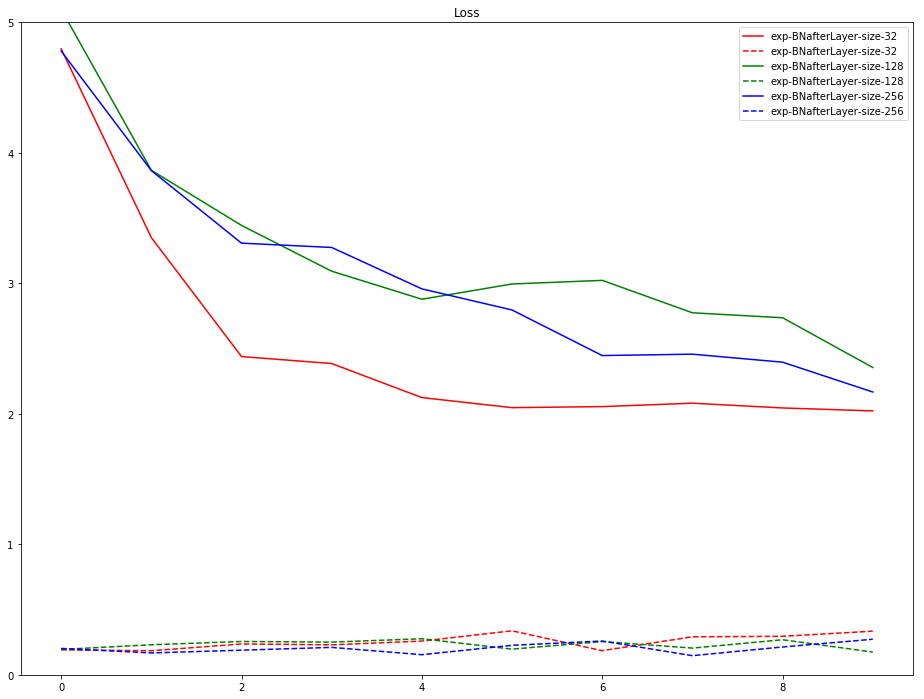

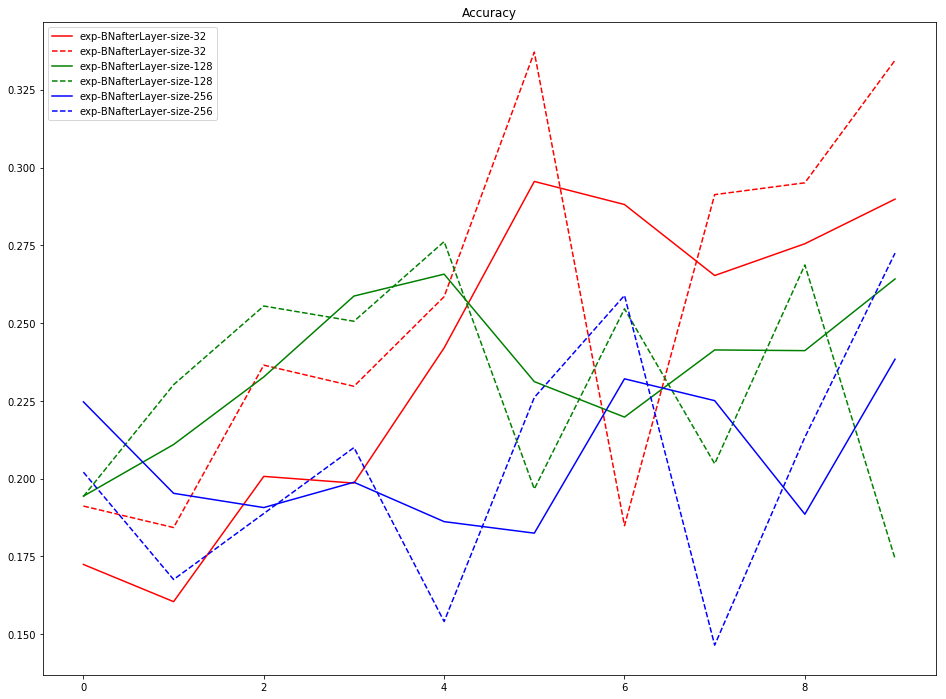

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b",'pink','aqua']

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val-loss'])),results[cond]['val-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['val-acc'])),results[cond]['val-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
from keras.layers import BatchNormalization

def build_bn_mlp(input_shape,out_units=10,num_neurons=[512,256,128]):
    input_layer=keras.layers.Input(input_shape)
    for i , num in enumerate(num_neurons):
        if i==0 :
            x=BatchNormalization()(input_layer)
            x=keras.layers.Dense(units=num,activation='relu',name='hidden_layer'+str(i+1))(input_layer)
            
        else:
            x=BatchNormalization()(x)
            x=keras.layers.Dense(units=num,activation='relu',name='hidden_layer'+str(i+1))(x)
            
    output_layer=keras.layers.Dense(units=out_units,activation='relu',name='output_layer')(x)
    model=keras.models.Model(inputs=[input_layer],outputs=[output_layer])
    return model

In [10]:

keras.backend.clear_session()
model=build_bn_mlp(x_train.shape[1:])
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=256,shuffle=True)
    
train_acc=model.history.history['acc']
train_loss=model.history.history['loss']
val_acc=model.history.history['val_acc']
val_loss=model.history.history['val_acc']
    
exp_tag_name=f'exp-BNbeforeLayer-size-256'
results[exp_tag_name]={'train-acc':train_acc,
                          'train-loss':train_loss,
                          'val-acc':val_acc,
                          'val-loss':val_loss}

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 3s 69us/step - loss: 2.5618 - acc: 0.2188 - val_loss: 2.1385 - val_acc: 0.2255
Epoch 2/10
50000/50000 [==============================] - 3s 55us/step - loss: 2.0013 - acc: 0.2972 - val_loss: 1.9805 - val_acc: 0.3275
Epoch 3/10
50000/50000 [==============================] - 3s 53us/step - loss: 1.9787 - acc: 0.3108 - val_loss: 2.0821 - val_acc: 0.3082
Epoch 4/10
50000/50000 [==============================] - 3s 53us/step - loss: 1.9207 - acc: 0.3407 - val_loss: 2.1058 - val_acc: 0.2910
Epoch 5/10
50000/50000 [==============================] - 3s 54us/step - loss: 1.9893 - acc: 0.2804 - val_loss: 2.0249 - val_acc: 0.2971
Epoch 6/10
50000/50000 [==============================] - 3s 54us/step - loss: 2.0227 - acc: 0.2738 - val_loss: 2.0588 - val_acc: 0.2784
Epoch 7/10
50000/50000 [==============================] - 3s 55us/step - loss: 1.9347 - acc: 0.3208 - val_loss: 2.0119 - val_acc

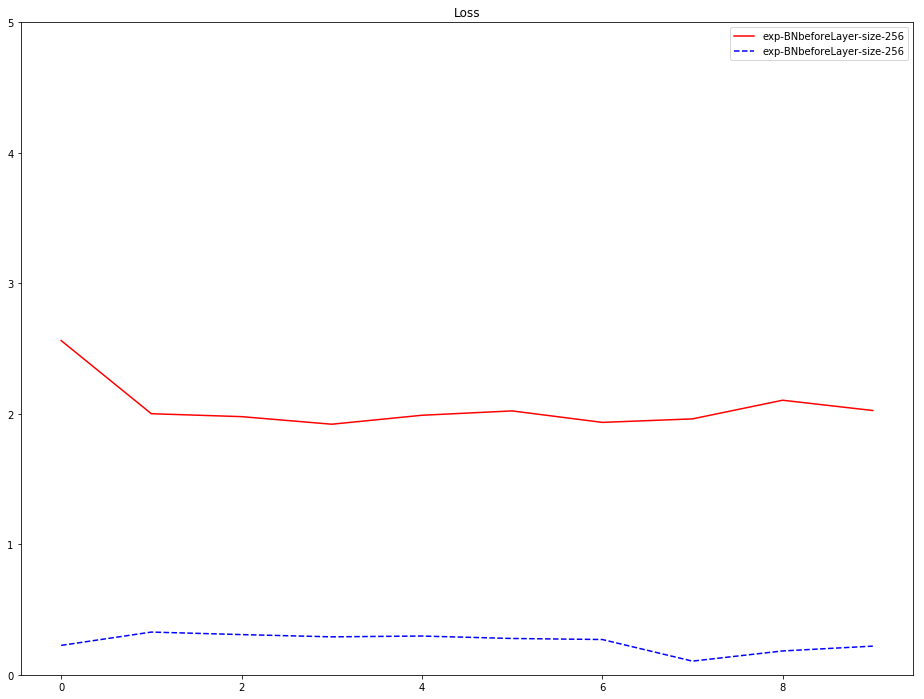

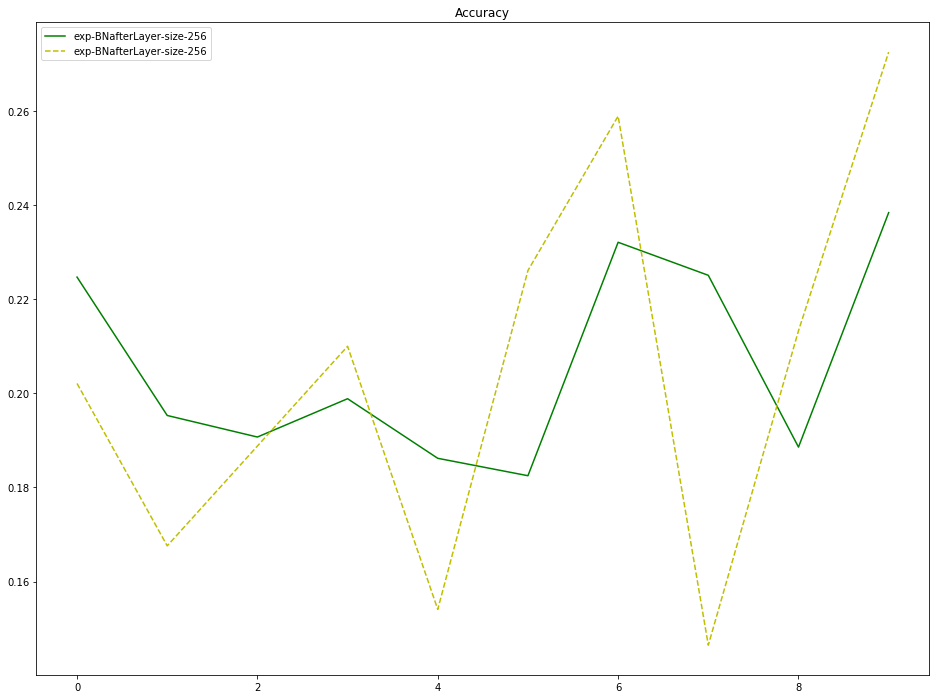

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(16,12))
plt.plot(range(len(results['exp-BNbeforeLayer-size-256']['train-loss'])),results['exp-BNbeforeLayer-size-256']['train-loss'], '-', label='exp-BNbeforeLayer-size-256', color='r')
plt.plot(range(len(results['exp-BNbeforeLayer-size-256']['val-loss'])),results['exp-BNbeforeLayer-size-256']['val-loss'], '--', label='exp-BNbeforeLayer-size-256', color='b')
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
plt.plot(range(len(results['exp-BNafterLayer-size-256']['train-acc'])),results['exp-BNafterLayer-size-256']['train-acc'], '-', label='exp-BNafterLayer-size-256', color='g')
plt.plot(range(len(results['exp-BNafterLayer-size-256']['val-acc'])),results['exp-BNafterLayer-size-256']['val-acc'], '--', label='exp-BNafterLayer-size-256', color='y')
plt.title("Accuracy")
plt.legend()
plt.show()